In [2]:
import numpy as np
from matplotlib import pyplot as plt

# Law of Large Numbers

Let's say we play a game of dice. The dice has equal probability of being a value from [1,6], inclusive. Each side of the dice is associated with a probabilty. This is called a Random Variable.

In [3]:
oneRoll = np.random.randint(1,7) #[1,7)
print(oneRoll)

2


When we generate random variables (each side of the dice) from a distribution (dice), we should expect ~1/6 (0.1667) probability for each side of the dice.

Text(0.5, 0, 'Face of the Die')

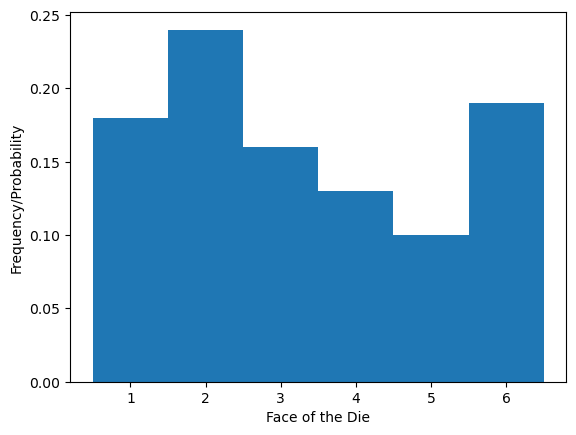

In [4]:
plt.hist(np.random.randint(1, 7, size=100), bins=np.linspace(0.5, 6.5, 7), density=True) #Density normalizes frequencies
# What happens when we increase the size?

plt.ylabel("Frequency/Probability")
plt.xlabel("Face of the Die")

### Let's compute the average of each round of simulation.

Text(0.5, 0, 'Num experiment')

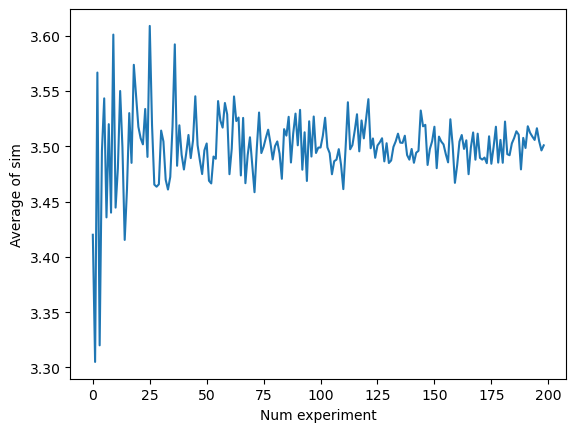

In [5]:
# Simulate a dice roll 100 times, then 200 times, then 300 times...etc. (up to N times) to see each average
N = 20000
simulations = range(100, N, 100) # increasing number of rolls by 100
outcomes = []

for rolls in simulations:
    average = np.mean(np.random.randint(1,7, size = rolls))
    outcomes = outcomes + [average]

plt.plot(outcomes)
plt.ylabel("Average of sim")
plt.xlabel("Num experiment")

In [6]:
outcomes

[3.42,
 3.305,
 3.566666666666667,
 3.32,
 3.496,
 3.5433333333333334,
 3.4357142857142855,
 3.52,
 3.44,
 3.601,
 3.4445454545454544,
 3.48,
 3.55,
 3.499285714285714,
 3.4153333333333333,
 3.46125,
 3.53,
 3.485,
 3.5736842105263156,
 3.5455,
 3.5176190476190476,
 3.5072727272727273,
 3.5017391304347827,
 3.53375,
 3.4904,
 3.608846153846154,
 3.5192592592592593,
 3.465357142857143,
 3.463448275862069,
 3.4656666666666665,
 3.5141935483870967,
 3.504375,
 3.4696969696969697,
 3.4608823529411765,
 3.4722857142857144,
 3.5180555555555557,
 3.592162162162162,
 3.4823684210526316,
 3.518974358974359,
 3.49225,
 3.4790243902439024,
 3.4935714285714288,
 3.510232558139535,
 3.4893181818181818,
 3.505333333333333,
 3.5452173913043477,
 3.501063829787234,
 3.4872916666666667,
 3.4748979591836733,
 3.4964,
 3.502549019607843,
 3.4688461538461537,
 3.466415094339623,
 3.490740740740741,
 3.4887272727272727,
 3.540892857142857,
 3.5233333333333334,
 3.516896551724138,
 3.5391525423728813,
 3.52

In [7]:
np.mean(outcomes) # Is this what we should expect?

3.4997963478549603

(array([  2.,   0.,   0.,   2.,   3.,  43., 107.,  36.,   3.,   3.]),
 array([3.305     , 3.33538462, 3.36576923, 3.39615385, 3.42653846,
        3.45692308, 3.48730769, 3.51769231, 3.54807692, 3.57846154,
        3.60884615]),
 <BarContainer object of 10 artists>)

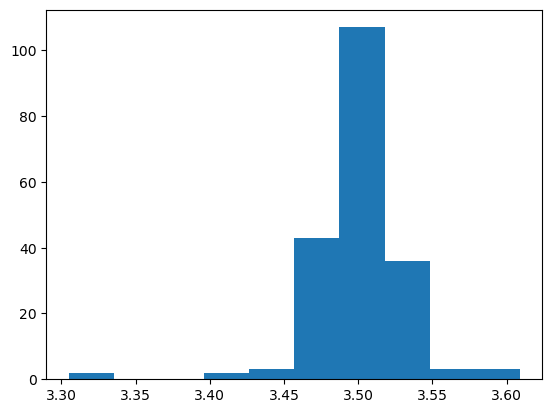

In [8]:
plt.hist(outcomes) # CLT: Is this what we should expect as well? 

Essentially, the Central Limit Theorem states that taking random samples with replacement, and then taking the average of those samples, the averages will follow a normal distribution.

(See https://seeing-theory.brown.edu/probability-distributions/index.html#section3)

Normal distribution is everywhere. We will see this again when we do stock returns.

# Monte Carlo: Estimating Pi

$$\frac{N_{circle}}{N_{total}} = \frac{Area_{circle}}{Area_{Square}}$$

$$Area_{Square} * \frac{N_c}{N_{total}} = Area_{circle}$$

In [9]:
# Setting up the experiments
trials = 1000000
radius = 1
inside = 0 #num points inside circle
outside = 0

x_coords = np.random.uniform(-1, 1, trials)
y_coords = np.random.uniform(-1, 1, trials)
print(x_coords)

[-0.83550491  0.00251568 -0.63428598 ...  0.08274685  0.3012833
 -0.29200164]


In [10]:
# running the experiments and storing the results
for i in range(trials):
    if (x_coords[i]**2 + y_coords[i]**2 <= radius**2):
        inside += 1
    else:  
        outside += 1

In [11]:
ratio_circle = inside / (inside + outside) #inside + outside = trials
print(ratio_circle)

0.78594


In [12]:
print("pi is about", 2*radius*2*ratio_circle)

pi is about 3.14376


# Visualizing

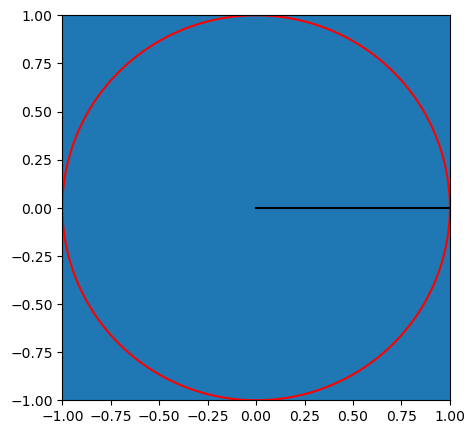

In [13]:
theta = np.linspace(0, 2*np.pi, 1000)
x = radius*np.cos(theta)
y = radius*np.sin(theta)

plt.figure(figsize = (5,5))
plt.plot(x, y, color = 'red')
plt.plot(np.linspace(0, 1, 1000), np.zeros(1000), color = "black")
plt.xlim(-1, 1)
plt.ylim(-1, 1)

plt.scatter(x_coords, y_coords, s = 1)

# Interesting Questions

# #1
![Estimating e](https://ggcarvalho.dev/img/posts/montecarlo/lex.png)

Tips:

1. np.mean(list) gives you the expected value of the list of values
2. list.append(n) adds the number 'n' to the end of the list
3. Always set up the experiment with a for loop of number of trials
4. Think about what variable needs to be resetted after every trial
5. While or for loop? Do you know how many selections needed?

In [14]:
results = [] # create empty list to store results of each experiment

for num_exp in range(100000): # simulating many experiments
    X = 0 # initialize variables, reset for each experiment
    n = 0 # counter
    while X < 1: # not sure how many selections we need, so a while loop
        
        X += np.random.uniform(0,1)
        n += 1
    results.append(n) # after snapping out of loop, append result of experiment to our "results" list
    
print("result from our Monte Carlo simulations:", np.mean(results), "\nEuler's number is:", np.e)

result from our Monte Carlo simulations: 2.71793 
Euler's number is: 2.718281828459045


# #2

## On average, how many times a die must be rolled until you get a 6?

Tips:

1. np.random.randint(1,7) simulates a dice roll [1,7)
2. While or for loop? Do you know how many selections needed?
3. What should you expect?

In [20]:
# should expect 6

results = []

for num_exp in range(10000):
    num_rolls = 0
    single_dice_roll = 0 # can be any number outside of [1,6], just to initialize the variable
    while single_dice_roll != 6:
        single_dice_roll = np.random.randint(1,7)
        num_rolls += 1
        
    results.append(num_rolls)
    
print(f'As expected, the mean number of trials is about 6: {np.mean(results):.2f} rolls')

As expected, the mean number of trials is about 6: 5.99 rolls


# #3

## If you break a stick of unit length at a point chosen uniformly at random, then what is the expected length of the shorter stick? What about the ratio of smaller to longer?

In [21]:
exp_len_short = []
ratio = []
for experiments in range(10000):
    length_to_break = np.random.uniform(0,1)
    if length_to_break < 0.5:
        short = length_to_break
        long = 1 - length_to_break
    else: 
        long = length_to_break
        short = 1 - length_to_break
    exp_len_short.append(short)
    ratio.append(short/long)
print("results from our MC:", np.mean(exp_len_short), "\nGoogle says we should expect 0.25")
print("\nresults from our MC:", np.mean(ratio), "\nGoogle says we should expect 2*ln2−1 ≈ 0.386 for the ratio")

results from our MC: 0.24939504266864052 
Google says we should expect 0.25

results from our MC: 0.38462354849142844 
Google says we should expect 2*ln2−1 ≈ 0.386 for the ratio


# #4

## An unfair coin is rolled 100 times. The probability of tails is 38 percent. What is the probability that there at least 40 heads? Use plt.hist() to see if your answer makes sense.

Tips:

1. np.random.binomial? How many trials, what's the probability, and what should n be? (Hint: Flipping 1 coin is a Bernoulli process)

In [24]:
# np.random.binomial(size = 100, p = 1-.38, n = 100) #flipping n times with probability of head p
np.mean(np.random.binomial(size = 1000000, p = 1-.38, n = 100) >= 40) # sums up how many times this condition is true
# almost always 100 percent! need a very large 'size' to see rare occurrences 

# Try this after changing the parameters. Does it make sense?

0.999999

# #5

## Benford's Law? Make a histogram plot of first digit in a distribution of numbers. (What distribution should you do? What do you assume?)

(array([11040., 11205., 11026., 11057., 11065., 11194., 11054., 11209.,
        11150.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <BarContainer object of 9 artists>)

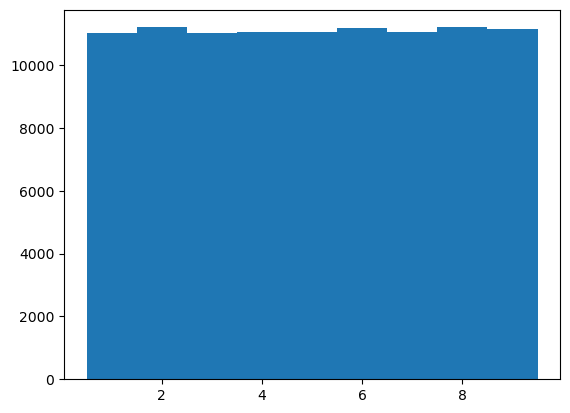

In [25]:
# If we generate a uniform distribution, we should expect a uniform distribution of the first digit.

rand_numbers = np.random.uniform(1,10000, size = 100000)
results = [int(str(num)[0]) for num in rand_numbers] # converting it to string, then taking the first digit
plt.hist(results, bins = np.linspace(0.5,9.5,10))

# In the real world, however, this is not what we see! 
# Benford's Law says that the leading digit of real life numerical dataset is likely to be small. 
# For example, 1 should occur the most as the leading digit, 2 the second most, etc.
# Pretty cool to read about. https://en.wikipedia.org/wiki/Benford%27s_law
# Try doing this with a real dataset, e.g. the population of countries, or the length of rivers, census, etc.

# #6

## Recreate the Monty Hall Problem and see if it is actually good to switch doors (Hint: it is).

In [60]:
n = 10000
win_if_switch = 0
n_doors = 3 # generalize to any number of doors, play around with this number. How does your win rate change? Does it make sense?

# in this experiment we are always switching and we are checking the win rate
for trial in range(n):
    # setup
    initial_doors = np.linspace(1, n_doors, n_doors, dtype = int)
    car = np.random.choice(initial_doors) # car is in a random door
    first_pick = np.random.choice(initial_doors) # you randomly pick a door

    # actions of host
    if car == first_pick:
        host_opens = np.random.choice( initial_doors[initial_doors != car] ) # Host opens one of the two remaining non-car doors
        switch = np.random.choice( initial_doors[(initial_doors != car) & (initial_doors != host_opens)] ) # switching
    if car != first_pick:
        host_opens = np.random.choice( initial_doors[(initial_doors != car) & (initial_doors != first_pick)] )
        switch = np.random.choice( initial_doors[(initial_doors != first_pick) & (initial_doors != host_opens)] )
    
    # checking if you win
    if switch == car:
        win_if_switch += 1

print(f'Win rate if switch every single time: {win_if_switch/n}') # win rate if you switch


Win rate if switch every single time: 0.6611
